# GGIS 407 Final Project 
## By: Garrick Hague

#### In this study, the main objective was to investigate the correlation between Canadian wildfires and ENSO (El Niño-Southern Oscillation). To initiate the analysis, a shapefile was acquired from the Canadian Wildland Fire Information System, encompassing data on fires from 1919 to 2020. To keep the analysis focused, specific columns such as the incident date, location, and fire size were selected for further examination.

#### Additionally, data from NOAA (National Oceanic and Atmospheric Administration) was obtained, which provided information on the ENSO phase and the associated year. By combining this ENSO dataset with the fire data, a comprehensive dataframe was created for analysis and comparison.

#### The subsequent investigation aimed to unveil any potential patterns or relationships between the occurrences of wildfires in Canada and the phases of ENSO.

### Guiding Question: 

#### To what extent do El Nino and La Nina events in the Nino 3.4 region contribute to the frequency and intensity of Canadian wildfires?


### Hypothesis: 

#### During the El Niño phase, the Earth experiences exceptionally high temperatures, leading me to believe that the environmental conditions become more favorable for the occurrence of fires. As a result, we can expect an increase in both the frequency and size of fires.

### Data

https://psl.noaa.gov/enso/past_events.html

https://cwfis.cfs.nrcan.gc.ca/datamart/metadata/nfdbpoly

## Import Needed Libraries

In [1]:

%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Increase the maximum number of displayed columns
pd.set_option('display.max_columns', None)

## Import Data & Create Dataframe

In [2]:
# Importing Fire Data
gdf = gpd.read_file('/home/jovyan/work/project/total_fire/NFDB_poly_20210707.shp')


In [3]:
# Filtering Columns Used in this analysis
sort_df = gdf[['SRC_AGENCY', 'FIRE_ID', 'YEAR', 'MONTH', 'SIZE_HA', 'geometry']]

sort_df.head()


,SRC_AGENCY,FIRE_ID,YEAR,MONTH,SIZE_HA,geometry
0,BC,2004-C10175,2004,6,1370.5,"POLYGON Z ((-1886926.467 898021.006 0.000, -18..."
1,BC,2004-C10176,2004,6,520.7,"POLYGON Z ((-1880308.251 892344.865 0.000, -18..."
2,BC,2004-C50114,2004,6,268.2,"POLYGON Z ((-1965048.293 820512.199 0.000, -19..."
3,BC,2004-C50125,2004,6,20506.4,"POLYGON Z ((-1995073.527 854615.146 0.000, -19..."
4,BC,2004-C50149,2004,6,2408.5,"POLYGON Z ((-1988211.829 940418.674 0.000, -19..."


In [4]:
# Data from https://psl.noaa.gov/enso/past_events.html

# Creating a DataFrame from NOAA's years in which they determined the phase of ENSO.

# El Nino years
el_nino_years = [1919, 1926, 1931, 1941, 1942, 1958, 1966, 1973, 1978, 1980, 1983,
                1987, 1988, 1992, 1995, 1998, 2003, 2007, 2010, 2016]

# Neutral years
neutral_years = [1920, 1921, 1922, 1923, 1924, 1927, 1928, 1929, 1930,
                 1932, 1933, 1935, 1936, 1937, 1938, 1940, 1944, 1945, 
                 1946, 1947, 1948, 1949, 1952, 1953, 1954, 1957, 1959, 
                 1960, 1961, 1963, 1964, 1965,1967, 1968, 1969, 1970, 
                 1972, 1975, 1977, 1979, 1981, 1982, 1984, 1985, 1986, 
                 1990, 1991, 1993, 1994,1996, 1997, 2001, 2002, 2004, 
                 2005, 2006, 2009, 2013, 2014, 2015, 2017, 2018, 2019, 2020]

# La Nina years
la_nina_years = [1917, 1918, 1925, 1934, 1939, 1943, 1950, 1951, 1955, 1956, 1962, 1971,
                 1974, 1976, 1989, 1999, 2000, 2008, 2011, 2012]

# Create a list to store all years
years = el_nino_years + neutral_years + la_nina_years

# Create a list to store the corresponding categories (El Nino, Neutral, or La Nina)
categories = (['El Nino'] * len(el_nino_years)) + (['Neutral'] * len(neutral_years)) + (['La Nina'] * len(la_nina_years))

# Create the DataFrame with two columns
nino_neutral_nina_df = pd.DataFrame({'YEAR': years, 'Category': categories})

# Display the DataFrame
print(nino_neutral_nina_df)

     YEAR Category
0    1919  El Nino
1    1926  El Nino
2    1931  El Nino
3    1941  El Nino
4    1942  El Nino
..    ...      ...
99   1999  La Nina
100  2000  La Nina
101  2008  La Nina
102  2011  La Nina
103  2012  La Nina

[104 rows x 2 columns]


In [5]:
len(el_nino_years)

20

## Analyzing and Clean Data

In [6]:
# Lets first look at the shape of the dataframe
sort_df.shape

(59539, 6)

In [7]:
# See Number of Null values
sort_df.isnull().sum()

SRC_AGENCY       0
FIRE_ID       6369
YEAR             0
MONTH            0
SIZE_HA          0
geometry         0
dtype: int64

In [8]:
# See data types
sort_df.dtypes

SRC_AGENCY      object
FIRE_ID         object
YEAR             int64
MONTH            int64
SIZE_HA        float64
geometry      geometry
dtype: object

In [9]:
# See what years are in the dataframe
sort_df['YEAR'].unique()

array([ 2004,  2005,  2006,  2007,  2008,  2009,  2010,  2011,  2012,
        1919,  1921,  1923,  1924,  1925,  1926,  1930,  1931,  1932,
        1933,  1934,  1935,  1936,  1937,  1938,  1939,  1940,  1941,
        1944,  1947,  1920,  1922,  1928,  1929,  1943,  1948,  1942,
        1945,  1946,  1949,  1927,  1954,  1917,  1918,  1950,  1959,
        1960,  1956,  1961,  1966,  1958,  1967,  1951,  1952,  1969,
        1955,  1957,  1968,  1965,  1953,  1963,  1962,  1964,  1970,
        1971,  1972,  1973,  1974,  1975,  1976,  1977,  1978,  1979,
        1980,  1981,  1982,  1983,  1984,  1985,  1986,  1987,  1988,
        1989,  1990,  1991,  1992,  1993,  1994,  1995,  1996,  1997,
        1998,  1999,  2000,  2001,  2002,  2003,  2013,  2014,  2015,
        2016,  2017,  2018,  2019,  2020, -9999])

In [10]:
# filter out null values years
sort_df = sort_df[sort_df['YEAR'] > 0]

In [11]:
print(f'Data starts: ', sort_df['YEAR'].unique().min())
print(f'Data ends:   ', sort_df['YEAR'].unique().max())

Data starts:  1917
Data ends:    2020


## Merging Dataframes Together

In [12]:
# Merge the two DataFrames on the 'YEAR' column
combined_df = sort_df.merge(nino_neutral_nina_df, on='YEAR')

# Display the merged DataFrame
combined_df

,SRC_AGENCY,FIRE_ID,YEAR,MONTH,SIZE_HA,geometry,Category
0,BC,2004-C10175,2004,6,1370.500000,"POLYGON Z ((-1886926.467 898021.006 0.000, -18...",Neutral
1,BC,2004-C10176,2004,6,520.700000,"POLYGON Z ((-1880308.251 892344.865 0.000, -18...",Neutral
2,BC,2004-C50114,2004,6,268.200000,"POLYGON Z ((-1965048.293 820512.199 0.000, -19...",Neutral
3,BC,2004-C50125,2004,6,20506.400000,"POLYGON Z ((-1995073.527 854615.146 0.000, -19...",Neutral
4,BC,2004-C50149,2004,6,2408.500000,"POLYGON Z ((-1988211.829 940418.674 0.000, -19...",Neutral
...,...,...,...,...,...,...,...
59427,NS,04-015-2020,2020,8,8.427398,"POLYGON Z ((2322096.715 -48195.198 0.000, 2322...",Neutral
59428,NS,04-015-2020,2020,8,1.382840,"POLYGON Z ((2322103.236 -48382.929 0.000, 2322...",Neutral
59429,NS,06-007-2020,2020,8,1.827475,"POLYGON Z ((2323755.951 73675.702 0.000, 23237...",Neutral
59430,NS,10-020-2020,2020,8,1.522256,"POLYGON Z ((2352329.161 216077.451 0.000, 2352...",Neutral


## Plotting Data

### First Plot: Total area burned per phase.

In [13]:
# Group by year and sum the 'SIZE_HA' values for each year
sum_by_year = combined_df.groupby(combined_df['YEAR'])['SIZE_HA'].sum()

# Convert the 'sum_by_year' Series into a DataFrame
sum_by_year_df = pd.DataFrame({'YEAR': sum_by_year.index, 'TOTAL_SIZE_HA': sum_by_year.values})

# Merge the two DataFrames on the 'Year' column
merged_df = sum_by_year_df.merge(nino_neutral_nina_df, on='YEAR')

# Display the merged DataFrame
merged_df

,YEAR,TOTAL_SIZE_HA,Category
0,1917,3.687000e+02,La Nina
1,1918,2.215000e+02,La Nina
2,1919,1.842797e+05,El Nino
3,1920,1.498101e+05,Neutral
4,1921,7.754460e+04,Neutral
...,...,...,...
99,2016,1.290641e+06,El Nino
100,2017,3.406223e+06,Neutral
101,2018,2.233614e+06,Neutral
102,2019,1.466419e+06,Neutral


In [14]:
# Group the data by category and calculate the total size burned for each category
grouped_df = merged_df.groupby('Category')['TOTAL_SIZE_HA'].sum()

print(grouped_df)

Category
El Nino    3.543492e+07
La Nina    2.641045e+07
Neutral    7.736882e+07
Name: TOTAL_SIZE_HA, dtype: float64


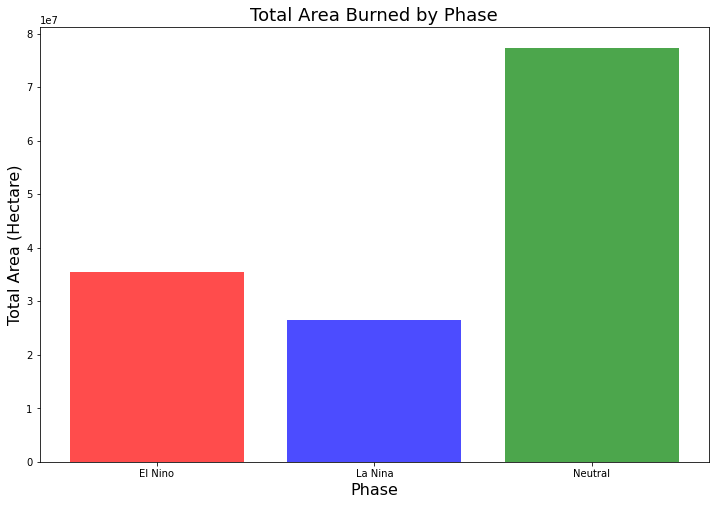

In [15]:
# Create the bar graph
plt.figure(figsize=(12, 8))

# Define custom colors for each category
colors = ['red', 'blue', 'green']

# Get the categories and their total area burned
categories = grouped_df.index
total_area_burned = grouped_df.values

# Plot the bar graph
plt.bar(categories, total_area_burned, color=colors, alpha=0.7)

# Add labels and title with larger font size
plt.xlabel('Phase', fontsize=16)
plt.ylabel('Total Area (Hectare)', fontsize=16)
plt.title('Total Area Burned by Phase', fontsize=18)

# Show the plot
plt.show()

### Second Plot: The yearly total area burned, categorized by phase.

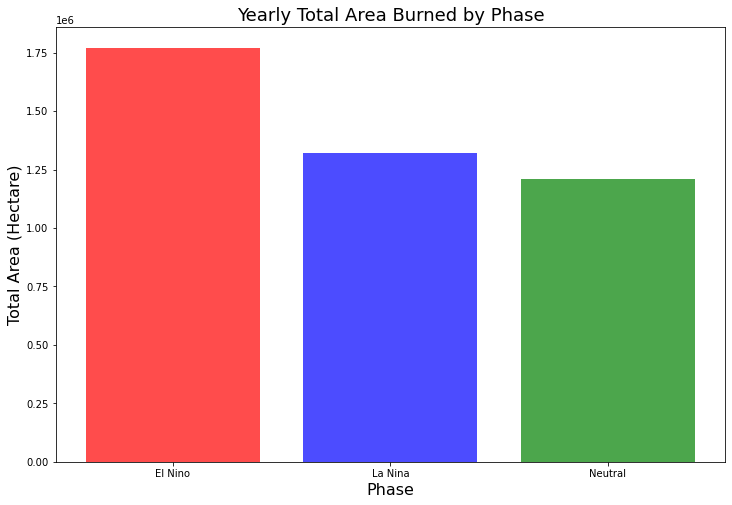

In [16]:
# Calculate the scaling factors for each phase
scaling_factor_el_nino = 1 / len(el_nino_years)
scaling_factor_la_nina = 1 / len(la_nina_years)
scaling_factor_neutral = 1 / len(neutral_years)

# Divide each column in by the respective scaling factor
el_nino_yt = grouped_df[grouped_df.index == 'El Nino'] * scaling_factor_el_nino
la_nino_yt = grouped_df[grouped_df.index == 'La Nina'] * scaling_factor_la_nina
neutral_yt = grouped_df[grouped_df.index == 'Neutral'] * scaling_factor_neutral

# Merge the dataframes back together
yearly_total = pd.concat([el_nino_yt, la_nino_yt, neutral_yt], axis=0)

# Create the bar graph
plt.figure(figsize=(12, 8))

# Get the categories and their total area burned
categories = yearly_total.index
total_area_burned = yearly_total.values

# Plot the bar graph
plt.bar(categories, total_area_burned, color=colors, alpha=0.7)

# Add labels and title with larger font size
plt.xlabel('Phase', fontsize=16)
plt.ylabel('Total Area (Hectare)', fontsize=16)
plt.title('Yearly Total Area Burned by Phase', fontsize=18)

# Show the plot
plt.show()

In [17]:
print(f'El Nino years burn {(((yearly_total[0]-yearly_total[1]) / yearly_total[0]) * 100)} percent more land than La nina')
print(f'El Nino years burn {(((yearly_total[0]-yearly_total[2]) / yearly_total[0]) * 100)} percent more land than Neutral')
print(f'La Nina years burn {(((yearly_total[1]-yearly_total[2]) / yearly_total[1]) * 100)} percent more land than Neutral')

El Nino years burn 25.46773573767982 percent more land than La nina
El Nino years burn 31.768556513080547 percent more land than Neutral
La Nina years burn 8.453816394500862 percent more land than Neutral


### Third Plot: A scatter plot was created to display the total area burned per year, with each data point colored according to its associated ENSO phase.

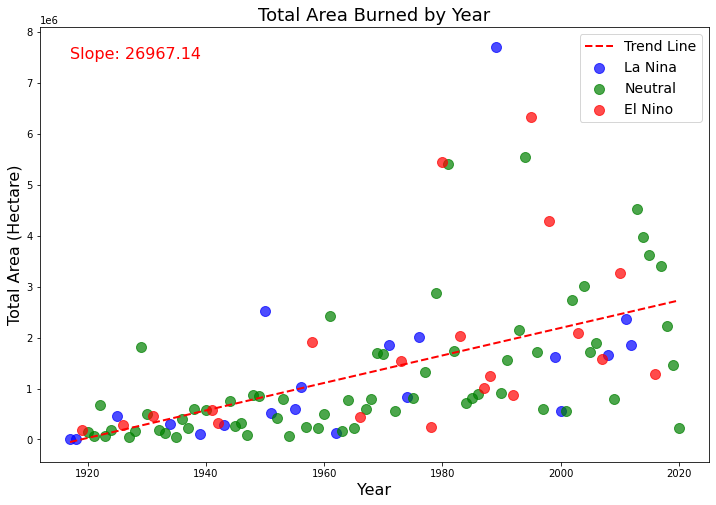

In [18]:
# Create a mapping dictionary to assign numerical codes to each category
category_mapping = {'La Nina': 0, 'Neutral': 1, 'El Nino': 2}

# Map the 'Category' column to numerical codes
merged_df['Category Code'] = merged_df['Category'].map(category_mapping)

# Convert the 'Year' column to numeric (if it contains non-numeric values)
merged_df['YEAR'] = pd.to_numeric(merged_df['YEAR'], errors='coerce')

# Drop rows with missing values in the 'Year' column, if any
merged_df = merged_df.dropna(subset=['YEAR'])

# Create the line plot
plt.figure(figsize=(12, 8))

# Define custom colors for each category
colors = {0: 'blue', 1: 'green', 2: 'red'}

# Plot the data points with different colors based on the category
for category_code, color in colors.items():
    category_df = merged_df[merged_df['Category Code'] == category_code]
    plt.scatter(category_df['YEAR'], category_df['TOTAL_SIZE_HA'], c=color, label=list(category_mapping.keys())[category_code], marker='o', s=100, alpha=0.7)

# Calculate the trend line
coefficients = np.polyfit(merged_df['YEAR'], merged_df['TOTAL_SIZE_HA'], deg=1)
trend_line = np.poly1d(coefficients)

# Plot the trend line
plt.plot(merged_df['YEAR'], trend_line(merged_df['YEAR']), color='r', linestyle='--', label='Trend Line', linewidth=2)

# Calculate the slope of the trend line
slope = coefficients[0]

# Add the slope as text on the plot in the top-left part with larger font size
plt.text(merged_df['YEAR'].min(), merged_df['TOTAL_SIZE_HA'].max(), f"Slope: {slope:.2f}", color='r', fontsize=16, ha='left', va='top')

# Add labels and title with larger font size
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Area (Hectare)', fontsize=16)
plt.title('Total Area Burned by Year', fontsize=18)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.show()

### Fourth Plot: A scatter plot was generated to illustrate the total area burned per year, with data points color-coded by their respective phases. Additionally, trend lines were added for each phase to provide further insights into the data.

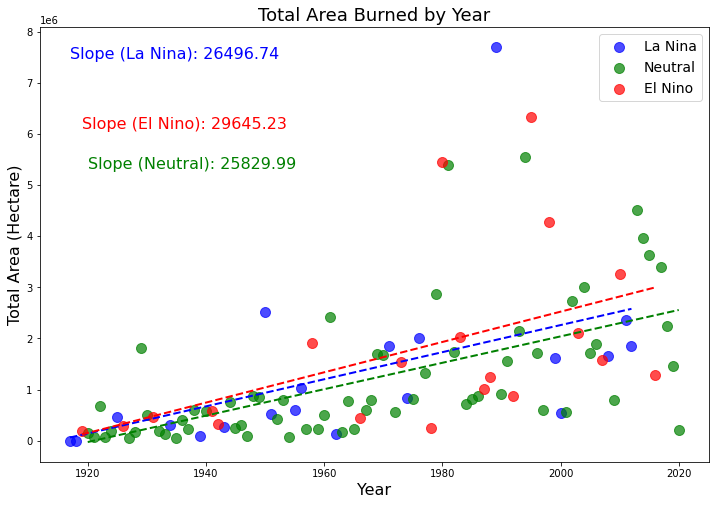

In [19]:
# Create the line plot
plt.figure(figsize=(12, 8))

# Define custom colors for each category
category_colors = {'El Nino': 'red', 'La Nina': 'blue', 'Neutral': 'green'}

# Perform linear regression and plot the trend lines for each category
for category, category_code in category_mapping.items():
    category_df = merged_df[merged_df['Category'] == category]
    
    # Calculate the trend line
    coefficients = np.polyfit(category_df['YEAR'], category_df['TOTAL_SIZE_HA'], deg=1)
    trend_line = np.poly1d(coefficients)
    
    # Plot the data points with different colors based on the category
    plt.scatter(category_df['YEAR'], category_df['TOTAL_SIZE_HA'], label=category, color=category_colors[category], marker='o', s=100, alpha=0.7)

    # Plot the trend line for the current category
    plt.plot(category_df['YEAR'], trend_line(category_df['YEAR']), linestyle='--', linewidth=2, color=category_colors[category])

    # Calculate the slope of the trend line for the current category
    slope = coefficients[0]
    
    # Add the slope as text on the plot in the top-left part with larger font size
    plt.text(category_df['YEAR'].min(), category_df['TOTAL_SIZE_HA'].max(), f"Slope ({category}): {slope:.2f}", color=category_colors[category], fontsize=16, ha='left', va='top')

# Add labels and title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Area (Hectare)', fontsize=16)
plt.title('Total Area Burned by Year', fontsize=18)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.show()


### Fifth plot: Plotting the geometry of each fire on a map, and coloring it based on the associated phase. 

In [20]:
# Define EPSG:4326 as the target CRS (latitude and longitude in decimal degrees)
target_crs = 'EPSG:4326'

# Use the 'to_crs()' method to transform the geometries to EPSG:4326
combined_df = combined_df.to_crs(target_crs)


In [21]:
# This process involves importing a shapefile for Natural Earth and then filtering it to retain only the data corresponding to Canada. 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gpd.datasets.get_path('naturalearth_lowres')

canada = world[world['iso_a3'] == 'CAN']

canada = canada.to_crs(target_crs)

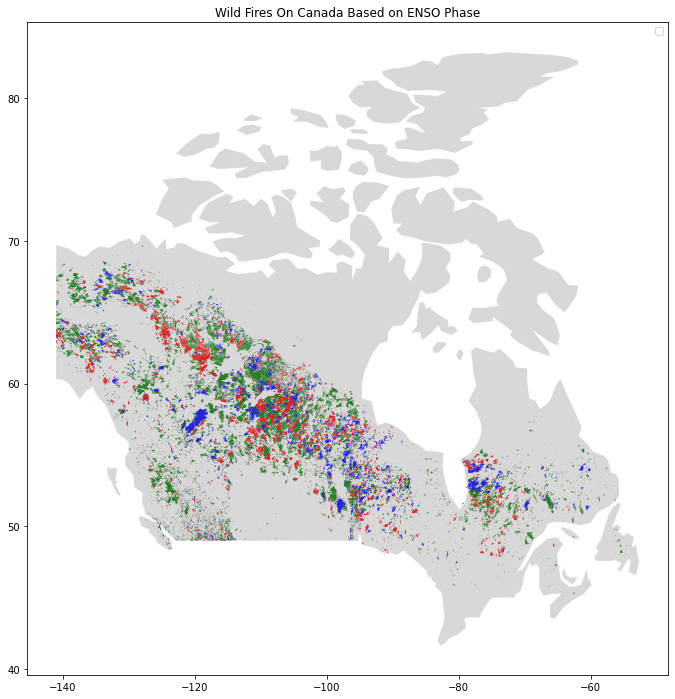

In [22]:
# Plot the data with 'Neutral' category first
plt.figure(figsize=(12, 12))
combined_df[combined_df['Category'] == 'Neutral'].plot(color=category_colors['Neutral'], ax=plt.gca())

# Plot the data with 'El Nino' category
combined_df[combined_df['Category'] == 'El Nino'].plot(color=category_colors['El Nino'], ax=plt.gca())

# Plot the data with 'La Nina' category
combined_df[combined_df['Category'] == 'La Nina'].plot(color=category_colors['La Nina'], ax=plt.gca())

# Plot Canada
canada.plot(color='gray', alpha=0.3, ax=plt.gca())

# Add legend
plt.legend(['Neutral', 'El Nino', 'La Nina'])

# Add Title
plt.title("Wild Fires On Canada Based on ENSO Phase")

plt.savefig('my_plot.png')

#### Sixth Plot: Total Area Burned for Each Provinces, Grouped by Phase

In [23]:
# List of specific values to filter
selected_agencies = ['BC', 'AB', 'SK', 'MB', 'ON', 'QC', 'YT', 'NT', 'NL']

# Filter the DataFrame to include only the selected agencies
combined_df = combined_df[combined_df['SRC_AGENCY'].isin(selected_agencies)]

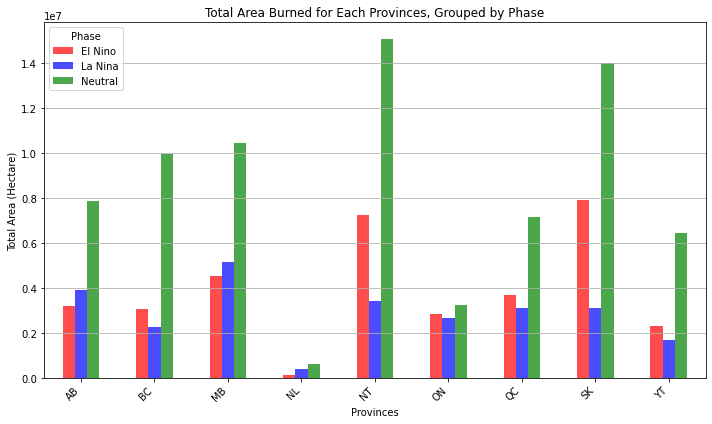

In [24]:
# Group the data by 'Category' and 'SRC_AGENCY', and calculate the sum of 'SIZE_HA' for each group
grouped_df = combined_df.groupby(['Category', 'SRC_AGENCY'])['SIZE_HA'].sum().reset_index()

# Pivot the data to have 'Category' as columns and 'SRC_AGENCY' as rows
pivot_df = grouped_df.pivot(index='SRC_AGENCY', columns='Category', values='SIZE_HA')

# Create a bar plot with custom colors
colors = ['red', 'blue', 'green']  # Define the colors for the categories
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors, alpha=0.7)

# Set labels and title
plt.xlabel('Provinces')
plt.ylabel('Total Area (Hectare)')
plt.title('Total Area Burned for Each Provinces, Grouped by Phase')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Phase', loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### Seventh Plot: Yearly Averaged Area Burned for Each Province, Grouped by Phase

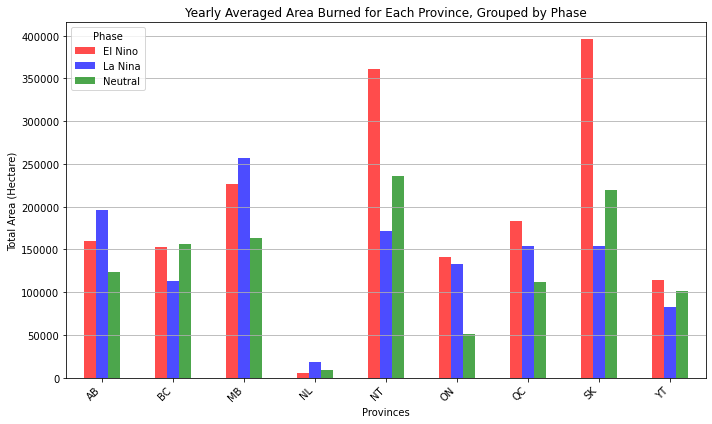

In [25]:
# Divide each column in 'pivot_df' by the respective scaling factor
pivot_df['El Nino'] *= scaling_factor_el_nino
pivot_df['La Nina'] *= scaling_factor_la_nina
pivot_df['Neutral'] *= scaling_factor_neutral

# Merge the dataframes back together
normalized_pivot_df = pd.concat([pivot_df['El Nino'], pivot_df['La Nina'], pivot_df['Neutral']], axis=1)

# Create a bar plot using custom colors
colors = ['red', 'blue', 'green']
normalized_pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors, alpha=0.7)

# Set labels and title
plt.xlabel('Provinces')
plt.ylabel('Total Area (Hectare)')
plt.title('Yearly Averaged Area Burned for Each Province, Grouped by Phase')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Phase', loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### Eighth Plot: Number of Fire Events per Province, Grouped by Phase

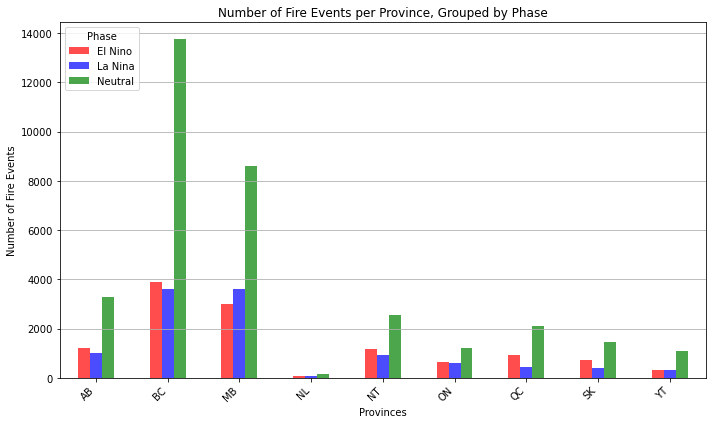

In [26]:
# Group the data by 'Category' and 'SRC_AGENCY', and calculate the count of fire events for each group
grouped_df = combined_df.groupby(['Category', 'SRC_AGENCY'])['SIZE_HA'].count().reset_index()

# Pivot the data to have 'Category' as columns and 'SRC_AGENCY' as rows
pivot_df = grouped_df.pivot(index='SRC_AGENCY', columns='Category', values='SIZE_HA')

# Create a bar plot with custom colors
colors = ['red', 'blue', 'green']  # Define the colors for the categories
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors, alpha=0.7)

# Set labels and title
plt.xlabel('Provinces')
plt.ylabel('Number of Fire Events')
plt.title('Number of Fire Events per Province, Grouped by Phase')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Phase', loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### Ninth Plot: Yearly Average Number of Fire Events per Province, Grouped by Phase

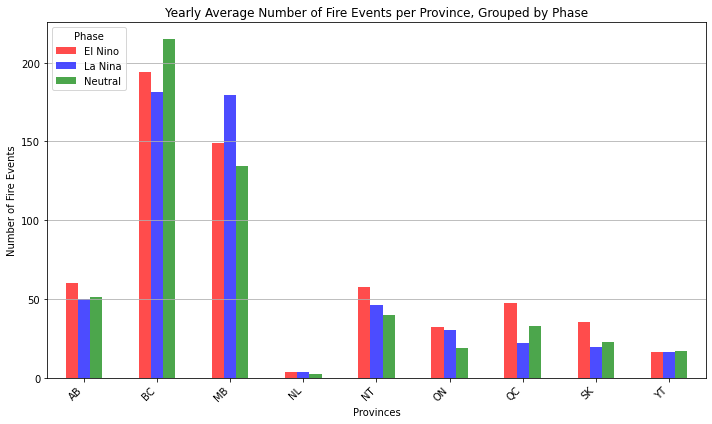

In [27]:
# Divide each column in 'pivot_df' by the respective scaling factor
pivot_df['El Nino'] *= scaling_factor_el_nino
pivot_df['La Nina'] *= scaling_factor_la_nina
pivot_df['Neutral'] *= scaling_factor_neutral

# Merge the dataframes back together
normalized_pivot_df = pd.concat([pivot_df['El Nino'], pivot_df['La Nina'], pivot_df['Neutral']], axis=1)

# Create a bar plot using seaborn with custom colors
colors = ['red', 'blue', 'green']  # Define the colors for the categories
normalized_pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors, alpha=0.7)

# Set labels and title
plt.xlabel('Provinces')
plt.ylabel('Number of Fire Events')
plt.title('Yearly Average Number of Fire Events per Province, Grouped by Phase')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Phase', loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### Tenth Plot: Number of Large Fire Events (> 200 Hectares) per Province, Grouped by Phase

In [28]:
# Filtering based on large fires
large_fires = combined_df[combined_df['SIZE_HA'] > 200]

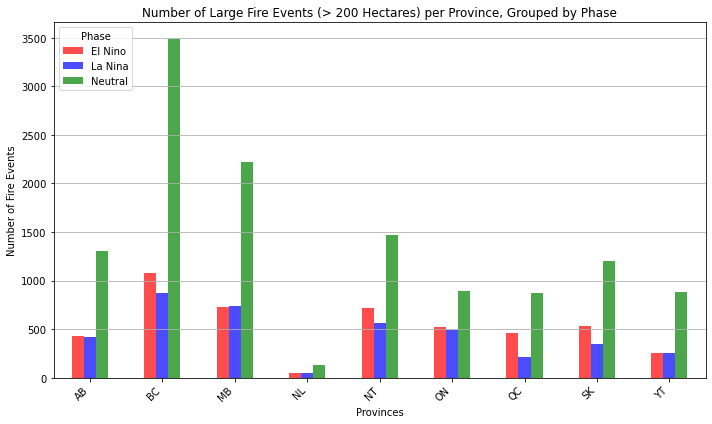

In [29]:
# Group the data by 'Category' and 'SRC_AGENCY', and calculate the count of fire events for each group
grouped_df = large_fires.groupby(['Category', 'SRC_AGENCY'])['SIZE_HA'].count().reset_index()

# Pivot the data to have 'Category' as columns and 'SRC_AGENCY' as rows
pivot_df = grouped_df.pivot(index='SRC_AGENCY', columns='Category', values='SIZE_HA')

# Create a bar plot with custom colors
colors = ['red', 'blue', 'green']  # Define the colors for the categories
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors, alpha=0.7)

# Set labels and title
plt.xlabel('Provinces')
plt.ylabel('Number of Fire Events')
plt.title('Number of Large Fire Events (> 200 Hectares) per Province, Grouped by Phase')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Phase', loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### Eleventh Plot: Yearly Average Number of Large Fire (Greater than 200 Hectare) Events per Province, Grouped by Phase

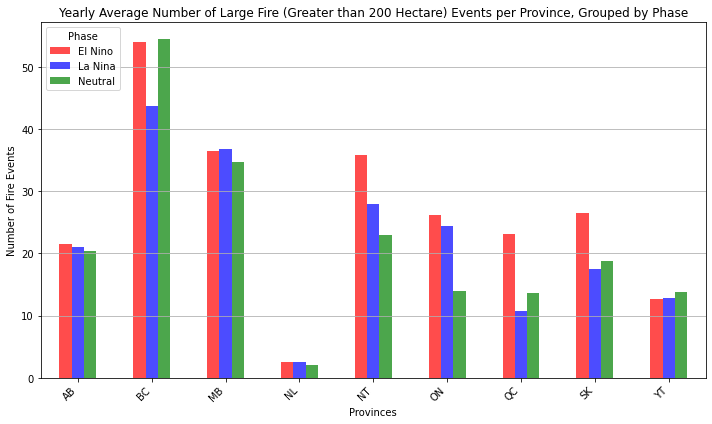

In [30]:
# Divide each column in 'pivot_df' by the respective scaling factor
pivot_df['El Nino'] *= scaling_factor_el_nino
pivot_df['La Nina'] *= scaling_factor_la_nina
pivot_df['Neutral'] *= scaling_factor_neutral

# Merge the dataframes back together
normalized_pivot_df = pd.concat([pivot_df['El Nino'], pivot_df['La Nina'], pivot_df['Neutral']], axis=1)

# Create a bar plot with custom colors
normalized_pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors, alpha=0.7)

# Set labels and title
plt.xlabel('Provinces')
plt.ylabel('Number of Fire Events')
plt.title('Yearly Average Number of Large Fire (Greater than 200 Hectare) Events per Province, Grouped by Phase')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Phase', loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Conclusion

### In the realm of Canadian wildfires, the influence of ENSO phases emerges as a complex and multi-faceted phenomenon. This analysis delved into the interplay between ENSO phases and the frequency, intensity, and location of wildfires, shedding light on noteworthy patterns and insights.
### The investigation underscored the significance of ENSO phases in shaping the burned area within Canada. El Niño, in particular, consistently exhibited the highest average total area burned per year, outpacing La Niña and Neutral phases by substantial margins. This observation indicates a strong association between El Niño and amplified wildfire activity. Furthermore, the study revealed that La Niña years experience a faster growth rate in burned area compared to El Niño years, reinforcing the nuanced dynamics at play.
### Examining provincial impacts further enriched the analysis. The variation in the most impactful phases for different provinces emphasized the complexity of ENSO's effects on wildfires. Alberta's susceptibility to La Niña-induced fires, in contrast to the broader trend of El Niño's impact, showcased the nuanced nature of these relationships. Most strikingly, the Northwest Territory and Saskatchewan consistently experienced larger burned areas during El Niño years, hinting at a region-specific amplification of the fire's impact.
### While the correlation between ENSO phases and fire events emerged as less pronounced, the Northwest Territory and Saskatchewan again stood out by registering fewer fire events but of significantly larger scale. This recurring pattern indicated that these regions are prone to infrequent yet substantial fire events during El Niño years, further deepening the understanding of their unique susceptibility.
### Ultimately, the intricate interplay between ENSO phases and Canadian wildfires showcases the dynamic nature of environmental systems. This analysis contributes valuable insights to both wildfire management and the broader field of climate impact assessment. As our understanding of these connections deepens, policymakers, researchers, and communities can better prepare for and mitigate the potential consequences of changing climatic conditions.
